<a href="https://colab.research.google.com/github/User21T/metody_numeryczne/blob/main/sprawozdanie_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center>Rozwiązywanie układów równań NxN</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych. To podstawowe zadanie algebry liniowej które macierzowo możemy zapisać jako:  
  
$
\mathbf{Ax}=\mathbf{b}
$
  
gdzie $\mathbf{A}$ - macierz współczynników, $\mathbf{x}$ - wektor zmiennych a $\mathbf{b}$ - wektor wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$
  

Do wykonania zadań niezbędne będą ponisze funkcje:

In [2]:
import numpy as np
import numpy.linalg as nplin
import scipy
import matplotlib
import matplotlib.pyplot as plt

from typing import Union, List, Tuple

def random_matrix_Ab(m:int):
    """Funkcja tworząca zestaw składający się z macierzy A (m,m) i wektora b (m,)  zawierających losowe wartości
    Parameters:
    m(int): rozmiar macierzy
    Results:
    (np.ndarray, np.ndarray): macierz o rozmiarze (m,m) i wektorem (m,)
                Jeżeli dane wejściowe niepoprawne funkcja zwraca None
    """
    if not(isinstance(m, int)):
      return None

    A = np.random.randint(m**2, size=(m, m))
    b = np.random.randint(m, size=m)
    return (A, b)

def residual_norm(A:np.ndarray,x:np.ndarray, b:np.ndarray) -> float:
    """Funkcja obliczająca normę residuum dla równania postaci:
    Ax = b

      Parameters:
      A: macierz A (m,m) zawierająca współczynniki równania
      x: wektor x (m.) zawierający rozwiązania równania
      b: wektor b (m,) zawierający współczynniki po prawej stronie równania

      Results:
      (float)- wartość normy residuom dla podanych parametrów"""
    A, x, b = np.asarray(A), np.asarray(x), np.asarray(b)
    r = b - np.dot(A, x)

    return nplin.norm(r)


def log_sing_value(n:int, min_order:Union[int,float], max_order:Union[int,float]):
    """Funkcja generująca wektor wartości singularnych rozłożonych w skali logarytmiczne

        Parameters:
         n(np.ndarray): rozmiar wektora wartości singularnych (n,), gdzie n>0
         min_order(int,float): rząd najmniejszej wartości w wektorze wartości singularnych
         max_order(int,float): rząd największej wartości w wektorze wartości singularnych
         Results:
         np.ndarray - wektor nierosnących wartości logarytmicznych o wymiarze (n,) zawierający wartości logarytmiczne na zadanym przedziale
         """
    if not(isinstance(n, int) and isinstance(min_order, (int, float)) and isinstance(min_order, (int, float))) or n <= 0:
      return None

    return np.logspace(min_order, max_order, num=n, dtype=np.uint)

def order_sing_value(n:int, order:Union[int,float] = 2, site:str = 'gre'):
    """Funkcja generująca wektor losowych wartości singularnych (n,) będących wartościami zmiennoprzecinkowymi losowanymi przy użyciu funkcji np.random.rand(n)*10.
        A następnie ustawiająca wartość minimalną (site = 'low') albo maksymalną (site = 'gre') na wartość o  10**order razy mniejszą/większą.

        Parameters:
        n(np.ndarray): rozmiar wektora wartości singularnych (n,), gdzie n>0
        order(int,float): rząd przeskalowania wartości skrajnej
        site(str): zmienna wskazująca stronnę zmiany:
            - site = 'low' -> sing_value[-1] * 10**order
            - site = 'gre' -> sing_value[0] * 10**order

        Results:
        np.ndarray - wektor wartości singularnych o wymiarze (n,) zawierający wartości logarytmiczne na zadanym przedziale
        """
    if not(isinstance(n, int) and isinstance(order, (int, float))) or n <= 0:
        return None

    sing_values = np.random.rand(n) * 10

    if site == 'low':
        sing_values[-1] *= 10**order
    elif site == 'gre':
        sing_values[0] *= 10**order
    else:
        return None

    return sing_values


def create_matrix_from_A(A:np.ndarray, sing_value:np.ndarray):
    """Funkcja generująca rozkład SVD dla macierzy A i zwracająca otworzenie macierzy A z wykorzystaniem zdefiniowanego wektora warości singularnych

            Parameters:
            A(np.ndarray): rozmiarz macierzy A (m,m)
            sing_value(np.ndarray): wektor wartości singularnych (m,)


            Results:
            np.ndarray: macierz (m,m) utworzoną na podstawie rozkładu SVD zadanej macierzy A z podmienionym wektorem wartości singularnych na wektor sing_valu """
    A, sing_value = np.asarray(A), np.asarray(sing_value)

    U,S,V = nplin.svd(A)

    return np.dot(U * sing_value, V)

***Zadanie 1***   

1. Zaimplementuj funkcje *random\_matrix\_Ab* według opisu powyzej generującą macierz kwadratową $\mathbf{A}$ i wektor $\mathbf{b}$ o zadanych wymiarach odpowiednio $m\times m$, $m\times 1$ i o wartościach losowych. W tym celu skorzystaj z funkcji *[randint](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randint.html)*. W razie podania nieprawidłowej wartości m funkcja ma zwrócić wartość None.

2. Wygeneruj takie macierze dla $m=10,\ 20,\ 50,\ 100,\ 1000$.

3. Zaimplementuj normę residual_norm zgodnie z opisem z main.py (używając *[norm](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.norm.html?highlight=norm#numpy.linalg.norm)*)


In [3]:
# Pętla dla różnych rozmiarów macierzy
for m in [10, 20, 50, 100, 1000]:
    # Generowanie losowej macierzy A i wektora b
    A, b = random_matrix_Ab(m)
    # Rozwiąż Ax = b dla x
    x = nplin.solve(A, b)
    print(f"{A=}")
    print(f"{b=}")
    print(f"{x=}")
    # Oblicz normę residuum dla b - Ax
    print(f"{residual_norm(A, x, b)=}")
    # Oblicz współczynnik uwarunkowania
    print(f"{nplin.cond(A)=}")

A=array([[59, 66, 17, 99, 18, 45, 79, 73, 16, 42],
       [ 4, 59, 18, 99, 11, 29, 82, 81, 61, 58],
       [38, 83, 58, 70, 38, 77, 41, 20, 11, 21],
       [15, 92, 22, 42, 51, 29,  0, 96, 54, 53],
       [95, 73, 94, 97, 22, 67, 43, 26, 54, 69],
       [55, 63, 89, 84, 13, 35, 96, 54, 36, 94],
       [ 4, 16,  0, 52, 28, 60, 75, 31, 22, 65],
       [94, 31,  0, 61, 77, 92, 79,  0,  1, 55],
       [11,  0, 54,  4, 30,  2, 90,  2, 65, 64],
       [85, 48, 46, 76, 47, 84, 32,  4, 63, 21]])
b=array([0, 8, 1, 0, 1, 0, 6, 5, 9, 6])
x=array([-0.06049686,  0.05966527, -0.09482712,  0.07247466,  0.04732356,
       -0.04723191,  0.04151264, -0.1528132 ,  0.11908033,  0.03125399])
residual_norm(A, x, b)=4.6840360722841785e-15
nplin.cond(A)=207.28080275554626
A=array([[282,  42, 151, 382, 282,  80, 258, 216, 216, 375, 312,  95,  80,
        229, 333, 349, 367, 356, 201, 253],
       [323,  90, 202, 269, 205, 260, 347, 185, 344, 140, 195, 250, 333,
        135, 381, 375, 383, 318, 168, 222],
     

***Zadanie 2***   

1. Dla macierzy i wektorów wygenerowanych w poprzednim zadaniu znajdź rozwiązanie układu równań $\mathbf{Ax}=\mathbf{b}$ używając funkcji *[solve](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.solve.html?highlight=solve#numpy.linalg.solve)*.

2. Sprawdź dokładność otrzymanego rozwiązania (oblicz normę residuum).

3. Określ uwarunkowanie macierzy $\mathbf{A}$ przy pomocy funkcji *[cond](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.cond.html?highlight=cond#numpy.linalg.cond)*.

4. Odpowiedź na pytanie czy zakres wartości oraz wymiary macierzy mają wpływ na jakość otrzymanych wyników?
  *  Im większe są zakres wartości oraz/lub wymiary macierzy, tym większa jest norma residuum, a tym samym większa jest różnica między prawidłowym wynikiem a otrzymanym.

5. Zbadać czas wykonania obliczeń przy pomocy funkcji *timeint*
  

***Zadanie 3***  
Rozkład dowolnej macierzy metodą  *[dekompozycji na wartości singularne](https://pl.wikipedia.org/wiki/Rozk%C5%82ad_wed%C5%82ug_warto%C5%9Bci_osobliwych)* można w Pythonie przeprowadzić przy pomocy funkcji *[svd](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.svd.html)*. Rozkład dla przykładowej macierzy obrazuje kod:

In [4]:
A = np.array([[1,2,3],[1,2,3],[1,2,3]])

# Użycie rozkładu SVD na macierzy A
U,S,V = nplin.svd(A)

print(S)
# Odtworzenie macierzy A przy pomocy metody SVD
A2 = np.dot(U * S, V)

print("Macierz A:\n {0}".format(A))
print("Macierz odtworzona z SVD:\n {0}".format(A2))

[6.4807407 0.        0.       ]
Macierz A:
 [[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz odtworzona z SVD:
 [[1. 2. 3.]
 [1. 2. 3.]
 [1. 2. 3.]]


Wykonaj następujące kroki:

1. Zdefiniuj funkcję inicjalizujące wektory *wartości singularnych* w następujący sposób:


- wektor nierosnących wartości singularnych w postaci wektora przestrzeni logarytmicznej, np:

In [5]:
S1 = np.logspace(100, 1, num=3)

- wektor nierosnących wartości singularnych, gdzie jedna wartość jest znacznie większa od pozostałych, np.:

In [6]:
S2 = np.logspace(100, 1, num=3)
S2[0] = S2[0]+100

- wektor nierosnących wartości, gdzie jedna wartość jest znacznie mniejsza od pozostałych.

In [7]:
S3 = np.logspace(100, 1, num=3)
S3[-1] = S3[0]-100



W celu inicjalizacji takich wektorów zaimplementuje funkcje:  
    - *log\_sing\_value* zgodnie z opisem w main.py i użyciu funkcji *[logspace](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.logspace.html?highlight=logspace#numpy.logspace)*
    - *order\_sing\_value* zgodnie z opisem w main.py

2. Zdefiniuj funkcję *create_matrix_from_A* z pliku main, która dla zadanej macierzy A z *zadania 1* i wektorów warości singularnych z punktu 1. tego zadania będzie zwracać odtworzoną macierz z podmienionym wektorem warości singularnych przy pomocy metody SVD, jak w przykładzie:


In [8]:
A = np.array([[1,2,3],[1,2,3],[1,2,3]])
U,S,V = nplin.svd(A)

A1 = np.dot(U * S1, V)
A2 = np.dot(U * S2, V)
A3 = np.dot(U * S3, V)
print('Macierz pierwotna:')
print(A)

print('Macierz na podstawie wartości S1:')
print(A1)

print('Macierz na podstawie wartości S2:')
print(A2)

print('Macierz na podstawie wartości S3:')
print(A3)

Macierz pierwotna:
[[1 2 3]
 [1 2 3]
 [1 2 3]]
Macierz na podstawie wartości S1:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S2:
[[1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]
 [1.5430335e+99 3.0860670e+99 4.6291005e+99]]
Macierz na podstawie wartości S3:
[[-4.02045290e+99  3.94198798e+99  5.91298198e+99]
 [ 9.14289726e+99  1.91685719e+99  2.87528579e+99]
 [-4.93343857e+98  3.39935582e+99  5.09903374e+99]]




3. Dla otrzymanych macierzy oblicz wartości współczynnika uwarunkowania.

4. Odpowiedz na pytanie: czy konieczne jest wyliczanie macierzy aby to zrobić?
  * Nie, nie jest konieczne wyliczanie macierzy, aby obliczyć wartość współczynnika uwarunkowania. Wystarczy zastosować rozkład SVD dla danej macierzy.

5. Dla każdego $m$ sporządź wykres normy residuów rozwiązań i funkcji uwarunkowania macierzy.




In [11]:
# Listy do przechowywania wyników
res_norms = []
dets = []
dets2 = []

# Pętla dla różnych rozmiarów macierzy
for m in [10, 20, 50, 100, 1000]:
    A, b = random_matrix_Ab(m)
    x = nplin.solve(A, b)

    # Generowanie wartości pojedynczych z domyślną modyfikacją kolejności
    sing_value1 = order_sing_value(m)
    # Generowanie wartości osobliwych w przestrzeni logarytmicznej
    sing_value2 = log_sing_value(m, 1, 1000)

    # Utwórz macierze z macierzy A ze zmodyfikowanymi wartościami osobliwymi
    matrix1 = create_matrix_from_A(A, sing_value1)
    matrix2 = create_matrix_from_A(A, sing_value2)

    print(f"{A=}")
    print(f"{x=}")
    print()

    res_norms.append(residual_norm(A, x, b))
    print(f"{residual_norm(A, x, b)=}")
    print()

    print(f"{matrix1=}")
    dets.append(nplin.cond(matrix1))
    print(f"{nplin.cond(matrix1)=}")

    print()

    print(f"{matrix2=}")
    dets2.append(nplin.cond(matrix2))
    print(f"{nplin.cond(matrix2)=}")

    print()

A=array([[56, 56, 55, 65, 70, 88, 40, 34, 39, 48],
       [66, 13, 12, 42, 10, 30, 25, 81,  9, 22],
       [81, 21, 17, 33, 81, 50, 11, 36, 88, 89],
       [66, 47, 30, 71, 47, 10, 72, 20, 89, 14],
       [76, 21, 22, 45, 27, 32, 91, 61, 20, 49],
       [48, 69, 34,  7, 82, 42, 29, 57,  2, 31],
       [16, 97, 35,  3, 56, 32, 41, 11,  2, 36],
       [ 9, 50, 40, 37, 10, 10, 86, 67, 10, 85],
       [ 9, 42, 17, 84,  3, 20, 31, 88, 41, 39],
       [68, 22, 31, 78, 54, 99, 64, 27, 39, 73]])
x=array([ 0.46963304,  0.18774141,  0.08080824,  0.76051919,  0.09124051,
       -0.69388661, -0.42524635, -0.39124114, -0.67987935,  0.45440341])

residual_norm(A, x, b)=3.628510508202875e-14

matrix1=array([[ 97.95826829,  78.20092008,  58.47458266,  90.41867104,
         87.14434124,  86.75322583,  93.55221261,  85.63521211,
         69.60813748,  92.26531444],
       [ 59.92586319,  47.78232917,  33.40946285,  56.20399573,
         50.14979081,  48.48299454,  53.71249624,  52.80942874,
         39.

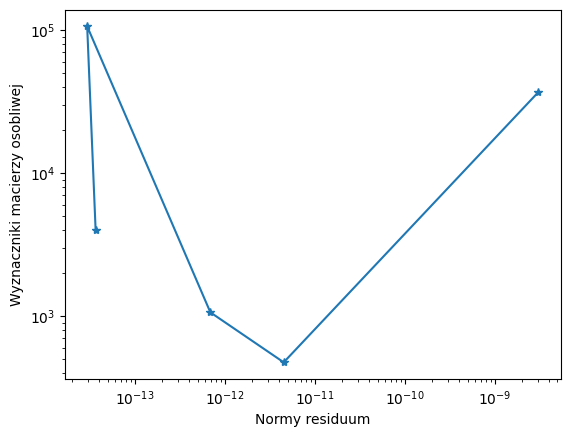

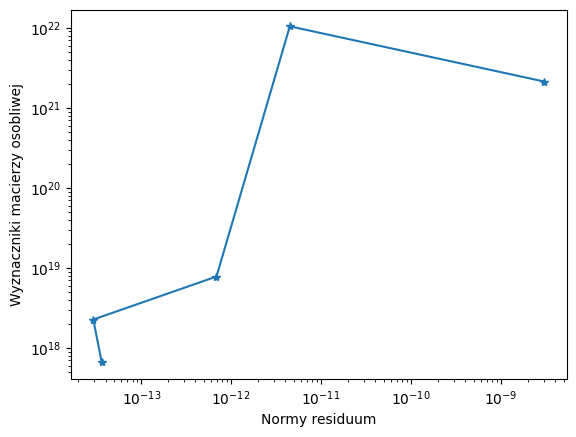

In [14]:
plt.figure(1)

plt.loglog(res_norms, dets, '-*')
plt.xlabel('Normy residuum')
plt.ylabel('Wyznaczniki macierzy osobliwej')

plt.figure(2)

plt.loglog(res_norms, dets2, '-*')
plt.xlabel('Normy residuum')
plt.ylabel('Wyznaczniki macierzy osobliwej')

plt.show()

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)